#Team Assignment


1.   Srinath Mannam
2.   Meghana Rao
3.   Govind



#Change the directory

In [122]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import os
working_directory = '/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/First_Assignment'
if os.getcwd() !=  working_directory:
  os.chdir(working_directory)
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/OVGU/Deep_Learning/First_Assignment'

#import statements

In [124]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from datasets import MNISTDataset

##Check tensorflow version

In [125]:
tf.__version__

'2.6.0'

#Load Data

In [126]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [127]:
#Re-shape the dataset and then pass it to the function which creates data into batches
def reset_Data():
  return MNISTDataset(train_images.reshape([-1, 784]), train_labels, 
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)

In [128]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize some images on some training and test data

1


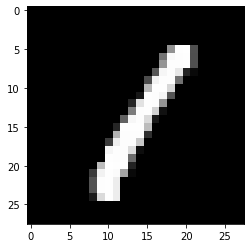

In [129]:
print(train_labels[3])
plt.imshow(train_images[3], cmap="Greys_r")

4


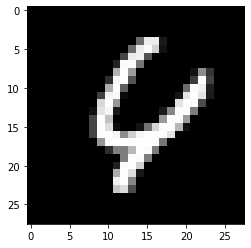

In [130]:
print(test_labels[121])
plt.imshow(test_images[121], cmap="Greys_r")

#A function that will choose the activation function

In [131]:
def dynamicActiFunc(actFun, currLogits):
  if actFun == "relu":
    return tf.nn.relu(currLogits)
  elif actFun == "sigmoid":
    return tf.nn.sigmoid(currLogits)
  else:
    return tf.nn.relu(currLogits)

#Define a Generic function for training which uses relu activation function

In [132]:
def model_Train(_modelConfig, data):
  loss_list = []
  for step in range(_modelConfig["train_steps"]):
      img_batch, lbl_batch = data.next_batch()
      with tf.GradientTape() as tape:
          #loop that will goes forward for every hidden layer
          for ind in range(len(_modelConfig["_weights"])-1):
            if ind == 0:
              hPrevLogits = tf.matmul(img_batch, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
              hPrevOutput = dynamicActiFunc(_modelConfig["activation_func"], hPrevLogits)
            else :
              hcurrLogits = tf.matmul(hPrevOutput, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
              hcurrOutput = dynamicActiFunc(_modelConfig["activation_func"], hcurrLogits)
              hPrevOutput = hcurrOutput

          lastInd = len(_modelConfig["_weights"])-1

          #final output layer
          logits = tf.matmul(hcurrOutput, _modelConfig["_weights"][lastInd]) + _modelConfig["_biases"][lastInd]
          xent = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
              logits=logits, labels=lbl_batch))
          
      grads = tape.gradient(xent, [*_modelConfig["_weights"], *_modelConfig["_biases"]])

      #update weights
      for ind in range(len(_modelConfig["_weights"])):
        _modelConfig["_weights"][ind].assign_sub(_modelConfig["learning_rate"] * grads[ind])
      
      #update biases
      for ind in range(len(_modelConfig["_biases"])):
        _modelConfig["_biases"][ind].assign_sub(_modelConfig["learning_rate"] * grads[ind + len(_modelConfig["_biases"])])

      loss_list.append(xent)
      if not step % 100:
          print(step)
          preds = tf.argmax(logits, axis=1, output_type=tf.int32)
          acc = tf.reduce_mean(tf.cast(tf.equal(preds, lbl_batch),
                              tf.float32))
          print("Loss: {} Accuracy: {}".format(xent, acc))

  #Predict for Test Dataset
  for ind in range(len(_modelConfig["_weights"])-1):
      if ind == 0:
        hPrevLogits = tf.matmul(data.test_data, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
        hPrevOutput = dynamicActiFunc(_modelConfig["activation_func"], hPrevLogits)
      else :
        hcurrLogits = tf.matmul(hPrevOutput, _modelConfig["_weights"][ind]) + _modelConfig["_biases"][ind]
        hcurrOutput = dynamicActiFunc(_modelConfig["activation_func"], hcurrLogits)
        hPrevOutput = hcurrOutput

  lastInd = len(_modelConfig["_weights"])-1
  test_preds = tf.argmax(tf.matmul(hcurrOutput, _modelConfig["_weights"][lastInd]) + _modelConfig["_biases"][lastInd], axis=1,
                       output_type=tf.int32)
  acc = tf.reduce_mean(tf.cast(tf.equal(test_preds, data.test_labels),
                              tf.float32))
  print("\nTest Accuracy: {}".format(acc))
  return loss_list

#Models

##Relu Activation Function

###Define params Model1

In [133]:
modelConfig1 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model2

In [134]:
modelConfig2 = {
    "train_steps" : 2000,
    "learning_rate" : 0.01,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model3

In [135]:
modelConfig3 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "relu",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 1568], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([1568, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(1568, dtype=np.float32)),
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

##Sigmoid Activation Function

###Define params Model4

In [136]:
modelConfig4 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model5

In [137]:
modelConfig5 = {
    "train_steps" : 2000,
    "learning_rate" : 0.01,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

###Define params Model6

In [138]:
modelConfig6 = {
    "train_steps" : 1000,
    "learning_rate" : 0.1,
    "activation_func" : "sigmoid",

    "_weights" : [
        tf.Variable(tf.random.uniform([784, 1568], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([1568, 512], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([512, 256], minval=-0.1, maxval=0.1, dtype=np.float32)),
        tf.Variable(tf.random.uniform([256, 10], minval=-0.1, maxval=0.1, dtype=np.float32))
    ],

    "_biases" : [
        tf.Variable(np.zeros(1568, dtype=np.float32)),
        tf.Variable(np.zeros(512, dtype=np.float32)),
        tf.Variable(np.zeros(256, dtype=np.float32)),
        tf.Variable(np.zeros(10, dtype=np.float32))
    ]
}

#Models Training

##Relu Models Training

In [139]:
relu_models_Loss = []
print("Model1 Start")
relu_models_Loss.append(model_Train(modelConfig1, reset_Data()))
print("Model1 End")
print("\n")

print("Model2 Start")
relu_models_Loss.append(model_Train(modelConfig2, reset_Data()))
print("Model2 End")
print("\n")

print("Model3 Start")
relu_models_Loss.append(model_Train(modelConfig3, reset_Data()))
print("Model3 End")
print("\n")

Model1 Start
0
Loss: 2.3315563201904297 Accuracy: 0.0625
100
Loss: 0.4881455600261688 Accuracy: 0.859375
200
Loss: 0.36677902936935425 Accuracy: 0.8671875
300
Loss: 0.456925630569458 Accuracy: 0.875
400
Loss: 0.35193076729774475 Accuracy: 0.90625
Starting new epoch...
500
Loss: 0.12760907411575317 Accuracy: 0.96875
600
Loss: 0.12430104613304138 Accuracy: 0.96875
700
Loss: 0.1805908977985382 Accuracy: 0.9609375
800
Loss: 0.18097612261772156 Accuracy: 0.9453125
900
Loss: 0.12154436111450195 Accuracy: 0.96875
Starting new epoch...

Test Accuracy: 0.954800009727478
Model1 End


Model2 Start
0
Loss: 2.486778974533081 Accuracy: 0.109375
100
Loss: 1.7385027408599854 Accuracy: 0.640625
200
Loss: 1.0969276428222656 Accuracy: 0.8359375
300
Loss: 0.7054908275604248 Accuracy: 0.8515625
400
Loss: 0.6221945881843567 Accuracy: 0.859375
Starting new epoch...
500
Loss: 0.6191551089286804 Accuracy: 0.8125
600
Loss: 0.4537007212638855 Accuracy: 0.8828125
700
Loss: 0.504408061504364 Accuracy: 0.859375
800

##Sigmoid Models Training

In [140]:
sigmoid_models_Loss = []
print("Model4 Start")
sigmoid_models_Loss.append(model_Train(modelConfig4, reset_Data()))
print("Model4 End")
print("\n")

print("Model5 Start")
sigmoid_models_Loss.append(model_Train(modelConfig5, reset_Data()))
print("Model5 End")
print("\n")

print("Model6 Start")
sigmoid_models_Loss.append(model_Train(modelConfig6, reset_Data()))
print("Model6 End")
print("\n")

Model4 Start
0
Loss: 2.3909518718719482 Accuracy: 0.1328125
100
Loss: 2.1196236610412598 Accuracy: 0.265625
200
Loss: 1.8060206174850464 Accuracy: 0.6015625
300
Loss: 1.2153583765029907 Accuracy: 0.671875
400
Loss: 0.978784441947937 Accuracy: 0.734375
Starting new epoch...
500
Loss: 0.7249417304992676 Accuracy: 0.8203125
600
Loss: 0.5582517385482788 Accuracy: 0.8671875
700
Loss: 0.5339407920837402 Accuracy: 0.859375
800
Loss: 0.6662670373916626 Accuracy: 0.8046875
900
Loss: 0.43666258454322815 Accuracy: 0.875
Starting new epoch...

Test Accuracy: 0.8756999969482422
Model4 End


Model5 Start
0
Loss: 2.3135275840759277 Accuracy: 0.078125
100
Loss: 2.2858312129974365 Accuracy: 0.171875
200
Loss: 2.2738163471221924 Accuracy: 0.125
300
Loss: 2.252098560333252 Accuracy: 0.3359375
400
Loss: 2.23966646194458 Accuracy: 0.171875
Starting new epoch...
500
Loss: 2.22794246673584 Accuracy: 0.34375
600
Loss: 2.196229934692383 Accuracy: 0.4609375
700
Loss: 2.176234722137451 Accuracy: 0.5546875
800
Lo

#visualize the loss

## Relu Loss

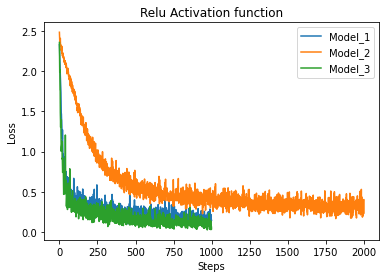

In [141]:
plt.plot(relu_models_Loss[0], label='Model_1')
plt.plot(relu_models_Loss[1], label='Model_2')
plt.plot(relu_models_Loss[2], label='Model_3')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Relu Activation function')
plt.legend()
plt.show()

## Sigmoid Loss

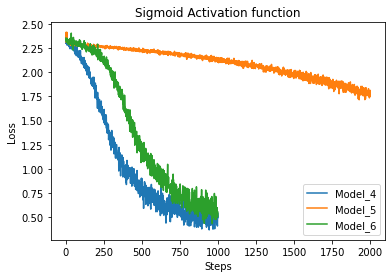

In [142]:
plt.plot(sigmoid_models_Loss[0], label='Model_4')
plt.plot(sigmoid_models_Loss[1], label='Model_5')
plt.plot(sigmoid_models_Loss[2], label='Model_6')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Sigmoid Activation function')
plt.legend()
plt.show()

#References


1.   http://blog.ai.ovgu.de/posts/jens/2019/002_tf20_basic_mnist/index.html

